In [1]:
import pandas as pd
data = pd.read_csv("final_data.csv")
data

,nyt headline mentions,nyt lead paragraph mentions,fox headline mentions,percent total population male,percent total population female,percent total population under 5 years,percent total population 5 to 9 years,percent total population 10 to 14 years,percent total population 15 to 19 years,percent total population 20 to 24 years,...,percent hispanic or latino and total population not hispanic or latino american indian and alaska native alone,percent hispanic or latino and total population not hispanic or latino asian alone,percent hispanic or latino and total population not hispanic or latino native hawaiian and other pacific islander alone,percent hispanic or latino and total population not hispanic or latino some other race alone,percent hispanic or latino and total population not hispanic or latino two or more races,percent hispanic or latino and total population not hispanic or latino two or more races two races including some other race,"percent hispanic or latino and total population not hispanic or latino two or more races two races excluding some other race, and three or more races","percent citizen, voting age population citizen, 18 and over population","percent citizen, voting age population citizen, 18 and over population male","percent citizen, voting age population citizen, 18 and over population female"
0,0,0,0,61.2,38.8,5.3,5.5,5.1,5.1,6.0,...,0.2,0.6,0.0,0.1,2.6,0.5,2.1,44815,62.9,37.1
1,1278,2177,1295,61.2,38.8,5.3,5.5,5.1,5.1,6.0,...,0.2,0.6,0.0,0.1,2.6,0.5,2.1,44815,62.9,37.1
2,0,0,2,61.2,38.8,5.3,5.5,5.1,5.1,6.0,...,0.2,0.6,0.0,0.1,2.6,0.5,2.1,44815,62.9,37.1
3,2,4,0,61.2,38.8,5.3,5.5,5.1,5.1,6.0,...,0.2,0.6,0.0,0.1,2.6,0.5,2.1,44815,62.9,37.1
4,3801,4775,2622,61.2,38.8,5.3,5.5,5.1,5.1,6.0,...,0.2,0.6,0.0,0.1,2.6,0.5,2.1,44815,62.9,37.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884746,1278,2177,1295,50.8,49.2,7.8,8.2,7.5,6.3,7.0,...,0.8,6.6,0.4,0.2,6.0,0.3,5.7,52381,50.4,49.6
884747,2,4,0,50.8,49.2,7.8,8.2,7.5,6.3,7.0,...,0.8,6.6,0.4,0.2,6.0,0.3,5.7,52381,50.4,49.6
884748,0,0,2,50.8,49.2,7.8,8.2,7.5,6.3,7.0,...,0.8,6.6,0.4,0.2,6.0,0.3,5.7,52381,50.4,49.6
884749,0,0,0,50.8,49.2,7.8,8.2,7.5,6.3,7.0,...,0.8,6.6,0.4,0.2,6.0,0.3,5.7,52381,50.4,49.6


In [2]:
column_list = list(data.columns)

for column in column_list:
    print(column)

nyt headline mentions
nyt lead paragraph mentions
fox headline mentions
percent total population male
percent total population female
percent total population under 5 years
percent total population 5 to 9 years
percent total population 10 to 14 years
percent total population 15 to 19 years
percent total population 20 to 24 years
percent total population 25 to 34 years
percent total population 35 to 44 years
percent total population 45 to 54 years
percent total population 55 to 59 years
percent total population 60 to 64 years
percent total population 65 to 74 years
percent total population 75 to 84 years
percent total population 85 years and over
percent total population under 18 years
percent total population 16 years and over
percent total population 18 years and over
percent total population 21 years and over
percent total population 62 years and over
percent total population 65 years and over
percent total population 18 years and over male
percent total population 18 years and over 

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [4]:
column = ['nyt headline mentions','nyt lead paragraph mentions','fox headline mentions']
X = data.drop(columns=column)  # Features
y = data['nyt headline mentions']  # Target variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 2073854.50
R^2 Score: 0.03



Feature Importances:
                                               Feature    Importance
61  percent hispanic or latino and total populatio...  2.898848e-01
49  percent total population two or more races whi...  1.488349e-01
35  percent total population one race asian asian ...  6.542657e-02
64  percent hispanic or latino and total populatio...  5.861557e-02
53  percent race alone or in combination with one ...  4.968237e-02
..                                                ...           ...
57  percent race alone or in combination with one ...  9.508167e-07
44  percent total population one race native hawai...  3.694622e-07
31  percent total population one race american ind...  0.000000e+00
45  percent total population one race native hawai...  0.000000e+00
32  percent total population one race american ind...  0.000000e+00

[78 rows x 2 columns]


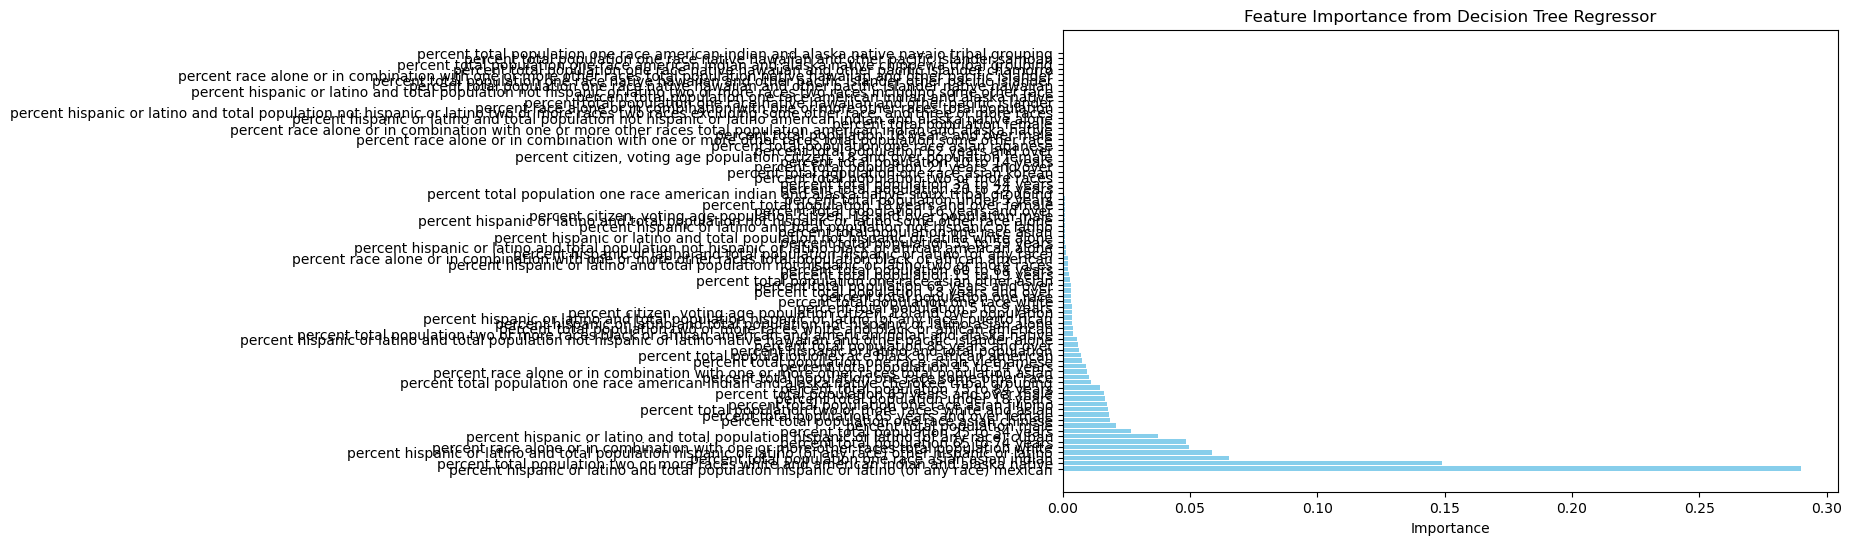

In [6]:
# Calculate feature importance
importance = dt_regressor.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree Regressor')
plt.show()


Mean Squared Error: 2073891.73
R^2 Score: 0.03

Feature Importances:
                                              Feature  Importance
61  percent hispanic or latino and total populatio...    0.286865
49  percent total population two or more races whi...    0.149886
35  percent total population one race asian asian ...    0.068997
64  percent hispanic or latino and total populatio...    0.047589
12            percent total population 65 to 74 years    0.036579
..                                                ...         ...
43  percent total population one race native hawai...    0.000297
46  percent total population one race native hawai...    0.000143
33  percent total population one race american ind...    0.000071
32  percent total population one race american ind...    0.000059
44  percent total population one race native hawai...    0.000036

[78 rows x 2 columns]


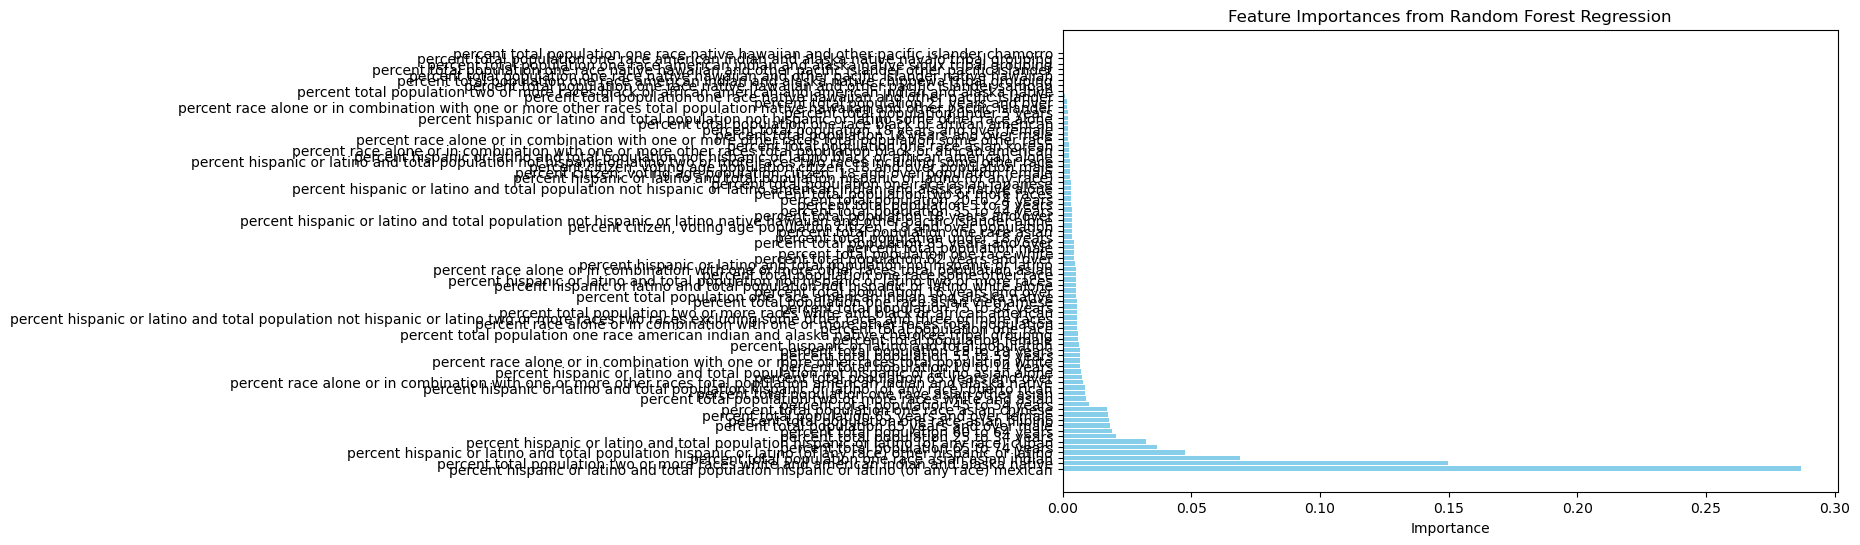

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R^2 score

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Feature Importance
importance = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importances:")
print(feature_importance_df)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest Regression')
plt.show()


Mean Squared Error: 2074850.77
R^2 Score: 0.03
                                                    Importance
percent hispanic or latino and total population...    0.259800
percent total population two or more races whit...    0.127527
percent total population one race asian vietnamese    0.067247
percent total population 25 to 34 years               0.054207
percent total population 65 to 74 years               0.039581
...                                                        ...
percent total population one race native hawaii...    0.000000
percent total population one race native hawaii...    0.000000
percent total population one race asian               0.000000
percent total population one race american indi...    0.000000
percent total population one race american indi...    0.000000

[78 rows x 1 columns]


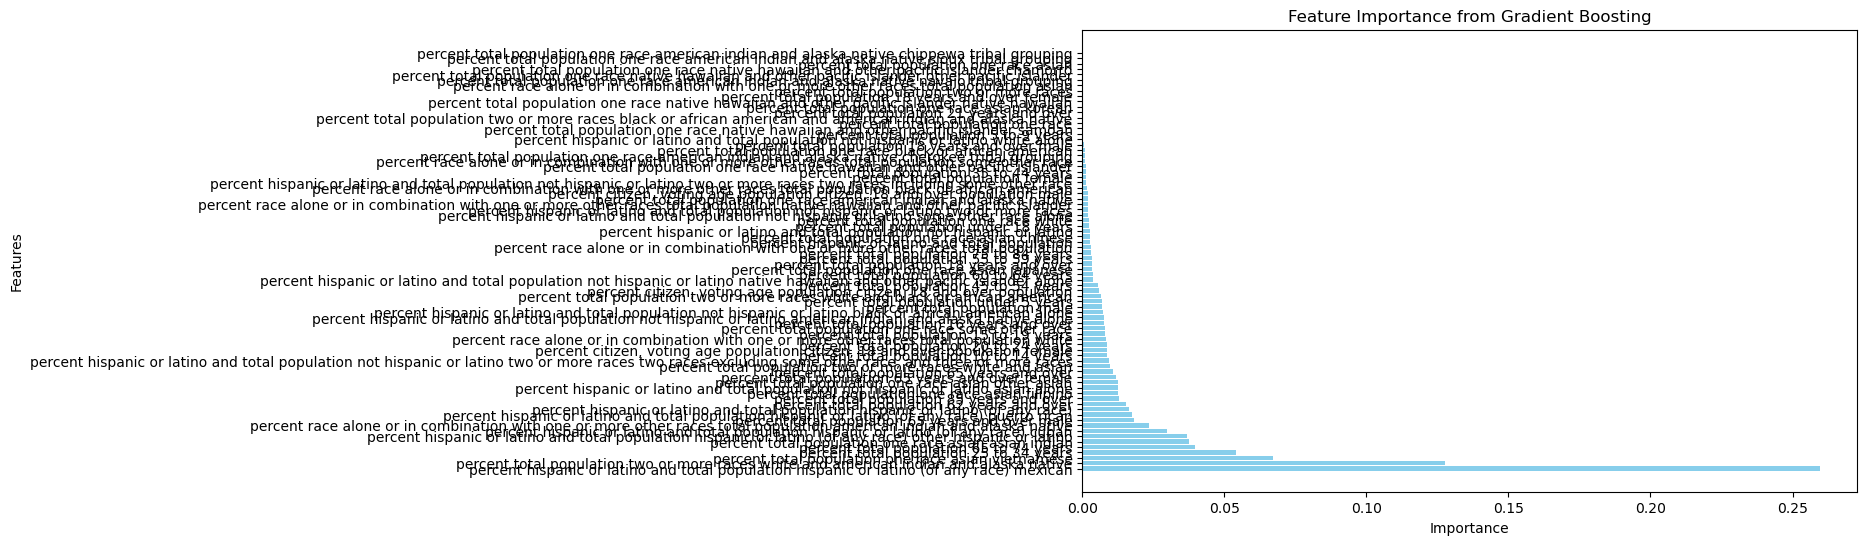

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

# Print feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance from Gradient Boosting")
plt.barh(feature_importances.index, feature_importances["Importance"], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
